In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import librosa, librosa.display
import IPython.display as ipd
import sklearn

%matplotlib inline

In [2]:
sns.set_theme()

In [3]:
data = pd.read_csv('data/meta/esc50.csv')
data.head()

,filename,fold,target,category,esc10,src_file,take
0,1-100032-A-0.wav,1,0,dog,True,100032,A
1,1-100038-A-14.wav,1,14,chirping_birds,False,100038,A
2,1-100210-A-36.wav,1,36,vacuum_cleaner,False,100210,A
3,1-100210-B-36.wav,1,36,vacuum_cleaner,False,100210,B
4,1-101296-A-19.wav,1,19,thunderstorm,False,101296,A


In [4]:
len(data)

2000

In [5]:
filenames = ('data/audio/'+data.filename)
filenames[2]

'data/audio/1-100210-A-36.wav'

In [6]:
ipd.Audio(filenames[2]) # Mixce sound

In [21]:
def preprocessing(filename, graph=None):
    # Signals and sampling rate(sr)
    signal, sr = librosa.load(filename, sr=22050)
    # Fast Fourier Transform
    fft = np.fft.fft(signal)
    # Magnitude and Frequency
    magnitude = np.abs(fft)
    frequency = np.linspace(0, sr, len(magnitude))
    
    # Plots
    if graph == "waveplot":
        librosa.display.waveplot(signal, sr)
        plt.xlabel('Time')
        plt.ylabel('Amplitude')
        plt.show()
    elif graph == "power spectrum":
        plt.plot(frequency, magnitude)
        plt.xlabel('Frequency');
        plt.ylabel('Magnitude');
        plt.show()
    elif graph == "spectrogram":
        # Short Time Fourier Transform
        stft = librosa.core.stft(signal, hop_length=512, n_fft=2048)
        # Spectrogram
        spectrogram = np.abs(stft)
        # Log Spectrogram
        log_spectrogram = librosa.amplitude_to_db(spectrogram)
        # Visualizing
        librosa.display.specshow(log_spectrogram, hop_length=512, sr=sr)
        plt.xlabel("Time")
        plt.ylabel("Frequency")
        plt.title("Spectrogram")
        plt.colorbar();
    elif graph == 'mfcc':
        # MFCCs
        MFCCs = librosa.feature.mfcc(signal, n_fft=2048, hop_length=512, n_mfcc=13)
        librosa.display.specshow(MFCCs, hop_length=512, sr=sr)
        plt.xlabel("Time")
        plt.ylabel("MFCC")
        plt.colorbar();
        plt.show()
    else:
        pass

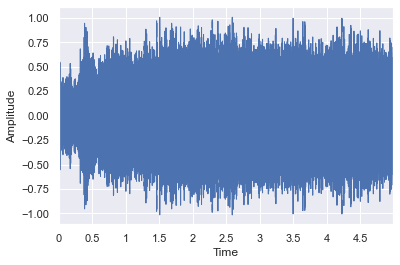

In [22]:
# wave Plot
preprocessing(filenames[2], graph='waveplot')

We have our waveplot here. Hence it is the sound of mixce it has higher amplitude in all the time

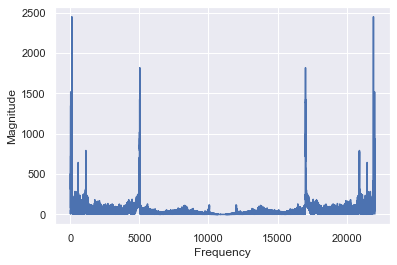

In [23]:
# Power Spectrum
preprocessing(filenames[2], graph='power spectrum')

The magnitude is higher only when the frequencies are a way higher or a way lower and in the middle of the frequencies the magnitude are quite low

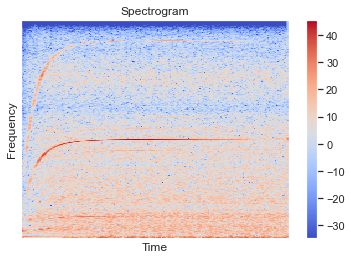

In [24]:
# Spectrogram
preprocessing(filenames[2], graph='spectrogram')

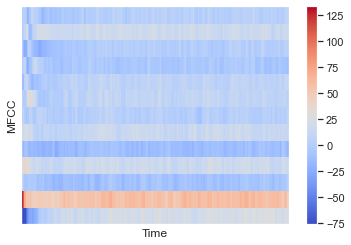

In [25]:
# Mel frequency cepstral coefficients (MFCC) 
preprocessing(filenames[2], graph='mfcc')

## Feature Extracting

In [28]:
signal, sr = librosa.load(filenames[2])

### Zero Crossing Rate
The zero crossing rate is the rate of sign-changes along a signal, i.e., the rate at which the signal changes from positive to negative or back

In [29]:
zero_crossing = librosa.zero_crossings(signal, pad=False)
sum(zero_crossing)

42736

### Spectral Centroid
It indicates where the ”centre of mass” for a sound is located and is calculated as the weighted mean of the frequencies present in the sound.

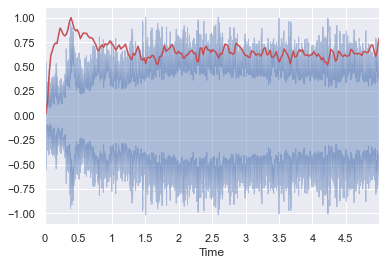

In [30]:
spectral_centroids = librosa.feature.spectral_centroid(signal, sr=sr)[0]

# Computing the time variable for visualization
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(signal, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')

### Spectral Rolloff

Spectral rolloff is the frequency below which a specified percentage of the total spectral energy

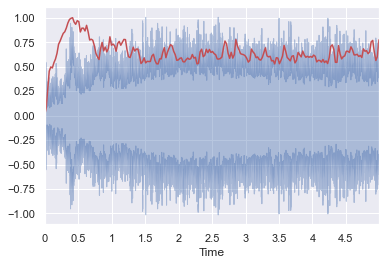

In [31]:
spectral_rolloff = librosa.feature.spectral_rolloff(signal, sr=sr)[0]
librosa.display.waveplot(signal, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')